After the dataset has been generated we need to write a [dataloader](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html). The dataloader is essentially a tool to make data loading easier and any future code more readable. A dataloader is a type of iterator [https://www.programiz.com/python-programming/iterator].

In [11]:
import pathlib as pt
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch

We will start off by creating a dataset class which will read in our tensor data.

In [12]:
class WSSDataset(Dataset):
    
    def __init__(self, files, transform=None):
        self.files = list(files)
        self.transform = transform

    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, idx):
        # load the torch data
        data = torch.load(self.files[idx])
        # apply the transforms
        if self.transform:
                data = self.transform(data)
        return data


In [13]:
wss_folder = pt.Path("torch_files")
dataset = WSSDataset(wss_folder.glob("*"))

In [14]:
print(dataset[0].keys(), dataset[0]["x"].shape, dataset[0]["y"].shape)

dict_keys(['x', 'y']) torch.Size([3, 541, 864]) torch.Size([1, 541, 864])


Notice as the input is cylindrical we can transform our data by rotating around the theta direction. Let us create a transform method which can be used to slightly augment our data.

In [15]:
class RandomRotate:
    def __init__(self, input_height, x_name="x", y_name="y"):
        self.input_height = input_height
        self.x_name = x_name
        self.y_name = y_name

    def __call__(self, sample):
        x, y = sample[self.x_name], sample[self.y_name]
        roll_val = int(torch.LongTensor(1).random_(0, self.input_height)[0])
        return {
            self.x_name: torch.roll(x, roll_val, 1), 
            self.y_name: torch.roll(y, roll_val, 1)
        }


In [16]:
# get the size of the data
print(dataset[0]["x"][1].shape)

torch.Size([541, 864])


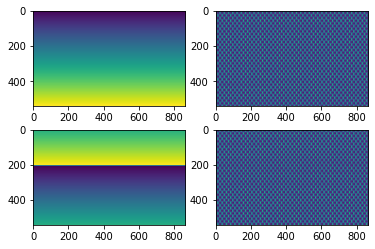

In [17]:

random_roller = RandomRotate(541)

f, ax = plt.subplots(2,2)
rolled_samples = random_roller(dataset[0])
ax[0,0].imshow(dataset[0]["x"][1])
ax[0,1].imshow(dataset[0]["y"][0])
ax[1,0].imshow(rolled_samples["x"][1])
ax[1,1].imshow(rolled_samples["y"][0])



We can now compose our dataset with transforms

In [18]:
dataset_transforms = transforms.Compose([RandomRotate(541)])
dataset = WSSDataset(wss_folder.glob("*"), transform=dataset_transforms)

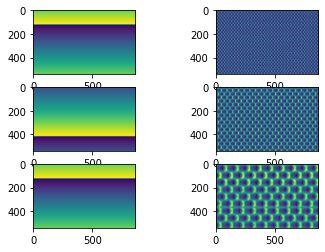

In [19]:
f, ax = plt.subplots(3,2)
ax[0,0].imshow(dataset[0]["x"][1])
ax[0,1].imshow(dataset[0]["y"][0])
ax[1,0].imshow(dataset[1]["x"][1])
ax[1,1].imshow(dataset[1]["y"][0])
ax[2,0].imshow(dataset[2]["x"][1])
ax[2,1].imshow(dataset[2]["y"][0])

Finally we can create a dataloader, which will control the batch size of our outputs, shuffle our data and preprocess any transforms.

torch.Size([2, 3, 541, 864]) torch.Size([2, 1, 541, 864])


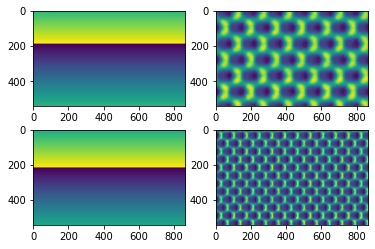

In [20]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
for i, data in enumerate(dataloader):
    # observe the second output of the dataloader
    if i > 1:
        x, y = data.values()
        break
print(x.shape, y.shape)

f, ax = plt.subplots(2,2)
rolled_samples = random_roller(dataset[0])
ax[0,0].imshow(x[0][1])
ax[0,1].imshow(y[0][0])
ax[1,0].imshow(x[1][1])
ax[1,1].imshow(y[1][0])